In [1]:
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0',inplace=True,axis=1)  #he 'Unnamed:0'column is numbered like index which is not related for analysis hence we will drop the column

In [7]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<Axes: ylabel='count'>

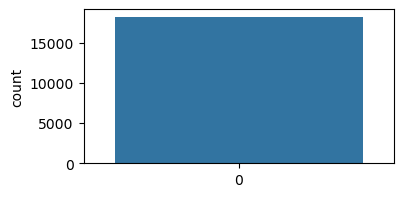

In [11]:
plt.figure(figsize=(4,2))
sns.countplot(df.year)

In [12]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [13]:
df.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [14]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

<Axes: xlabel='year', ylabel='AveragePrice'>

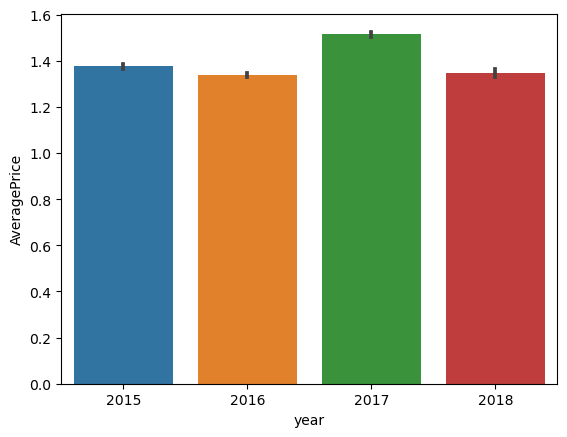

In [15]:
sns.barplot(x='year',y='AveragePrice',data=df)

<Axes: xlabel='year', ylabel='Total Volume'>

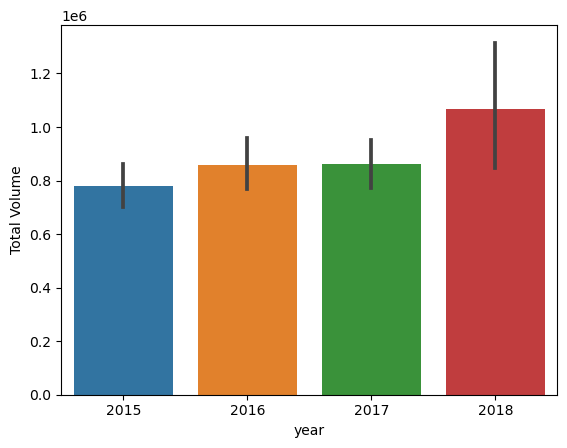

In [16]:
sns.barplot(x='year',y='Total Volume',data=df)

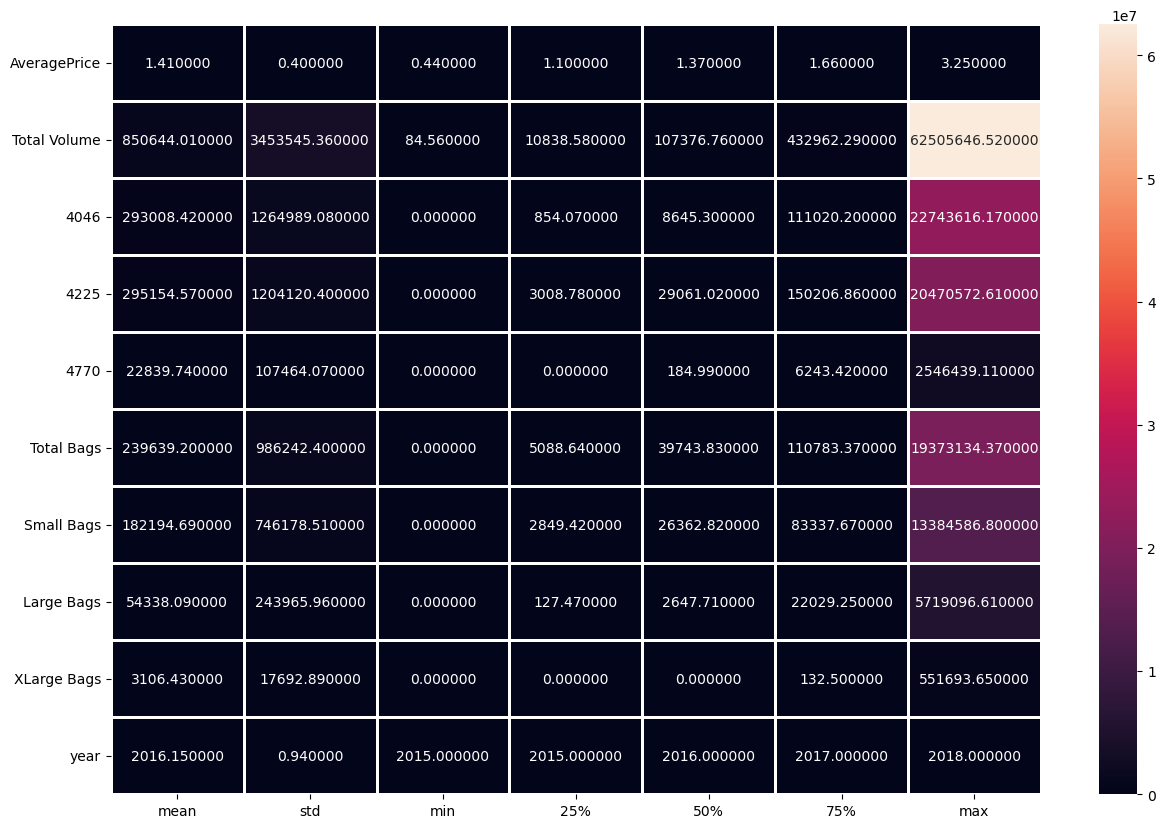

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")

plt.show()

<Axes: >

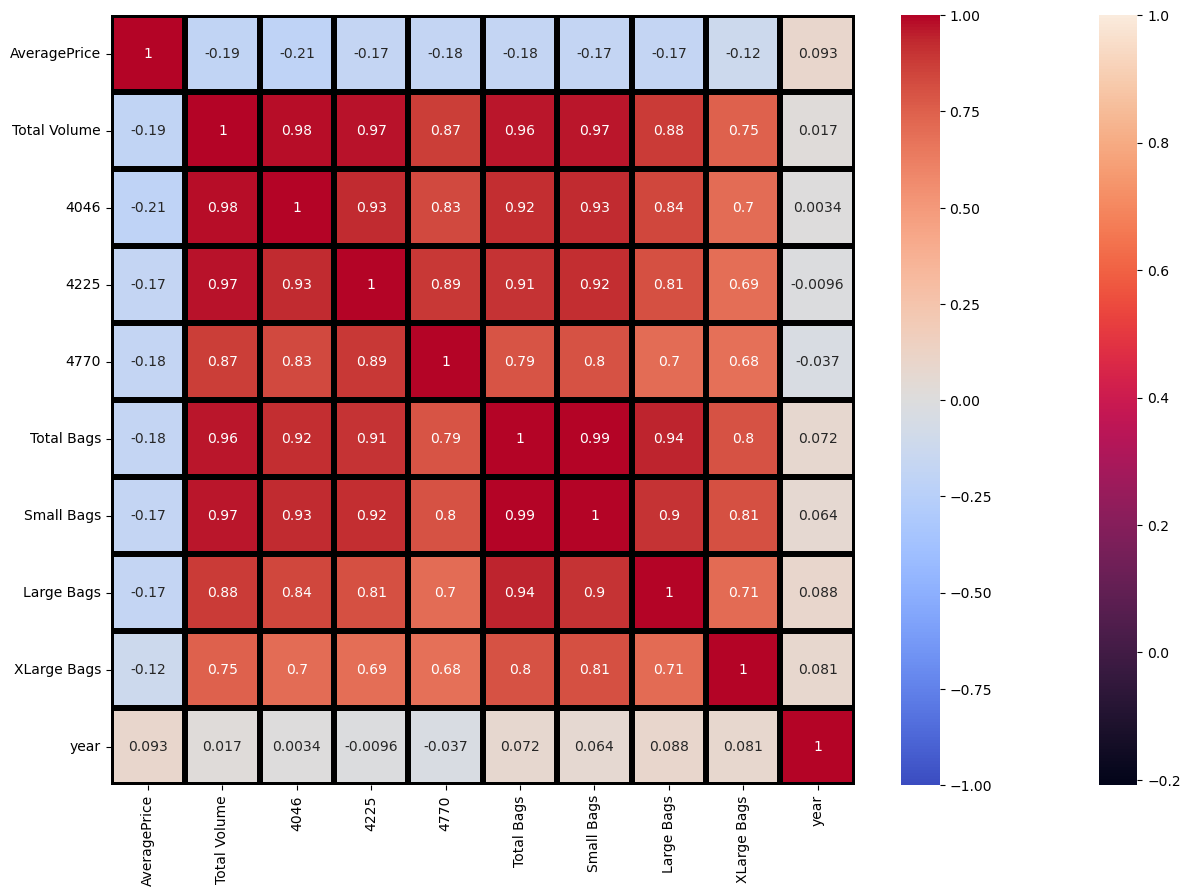

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

array([[<Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': '4046'}>],
       [<Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>,
        <Axes: title={'center': 'Total Bags'}>],
       [<Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>,
        <Axes: title={'center': 'XLarge Bags'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >, <Axes: >]],
      dtype=object)

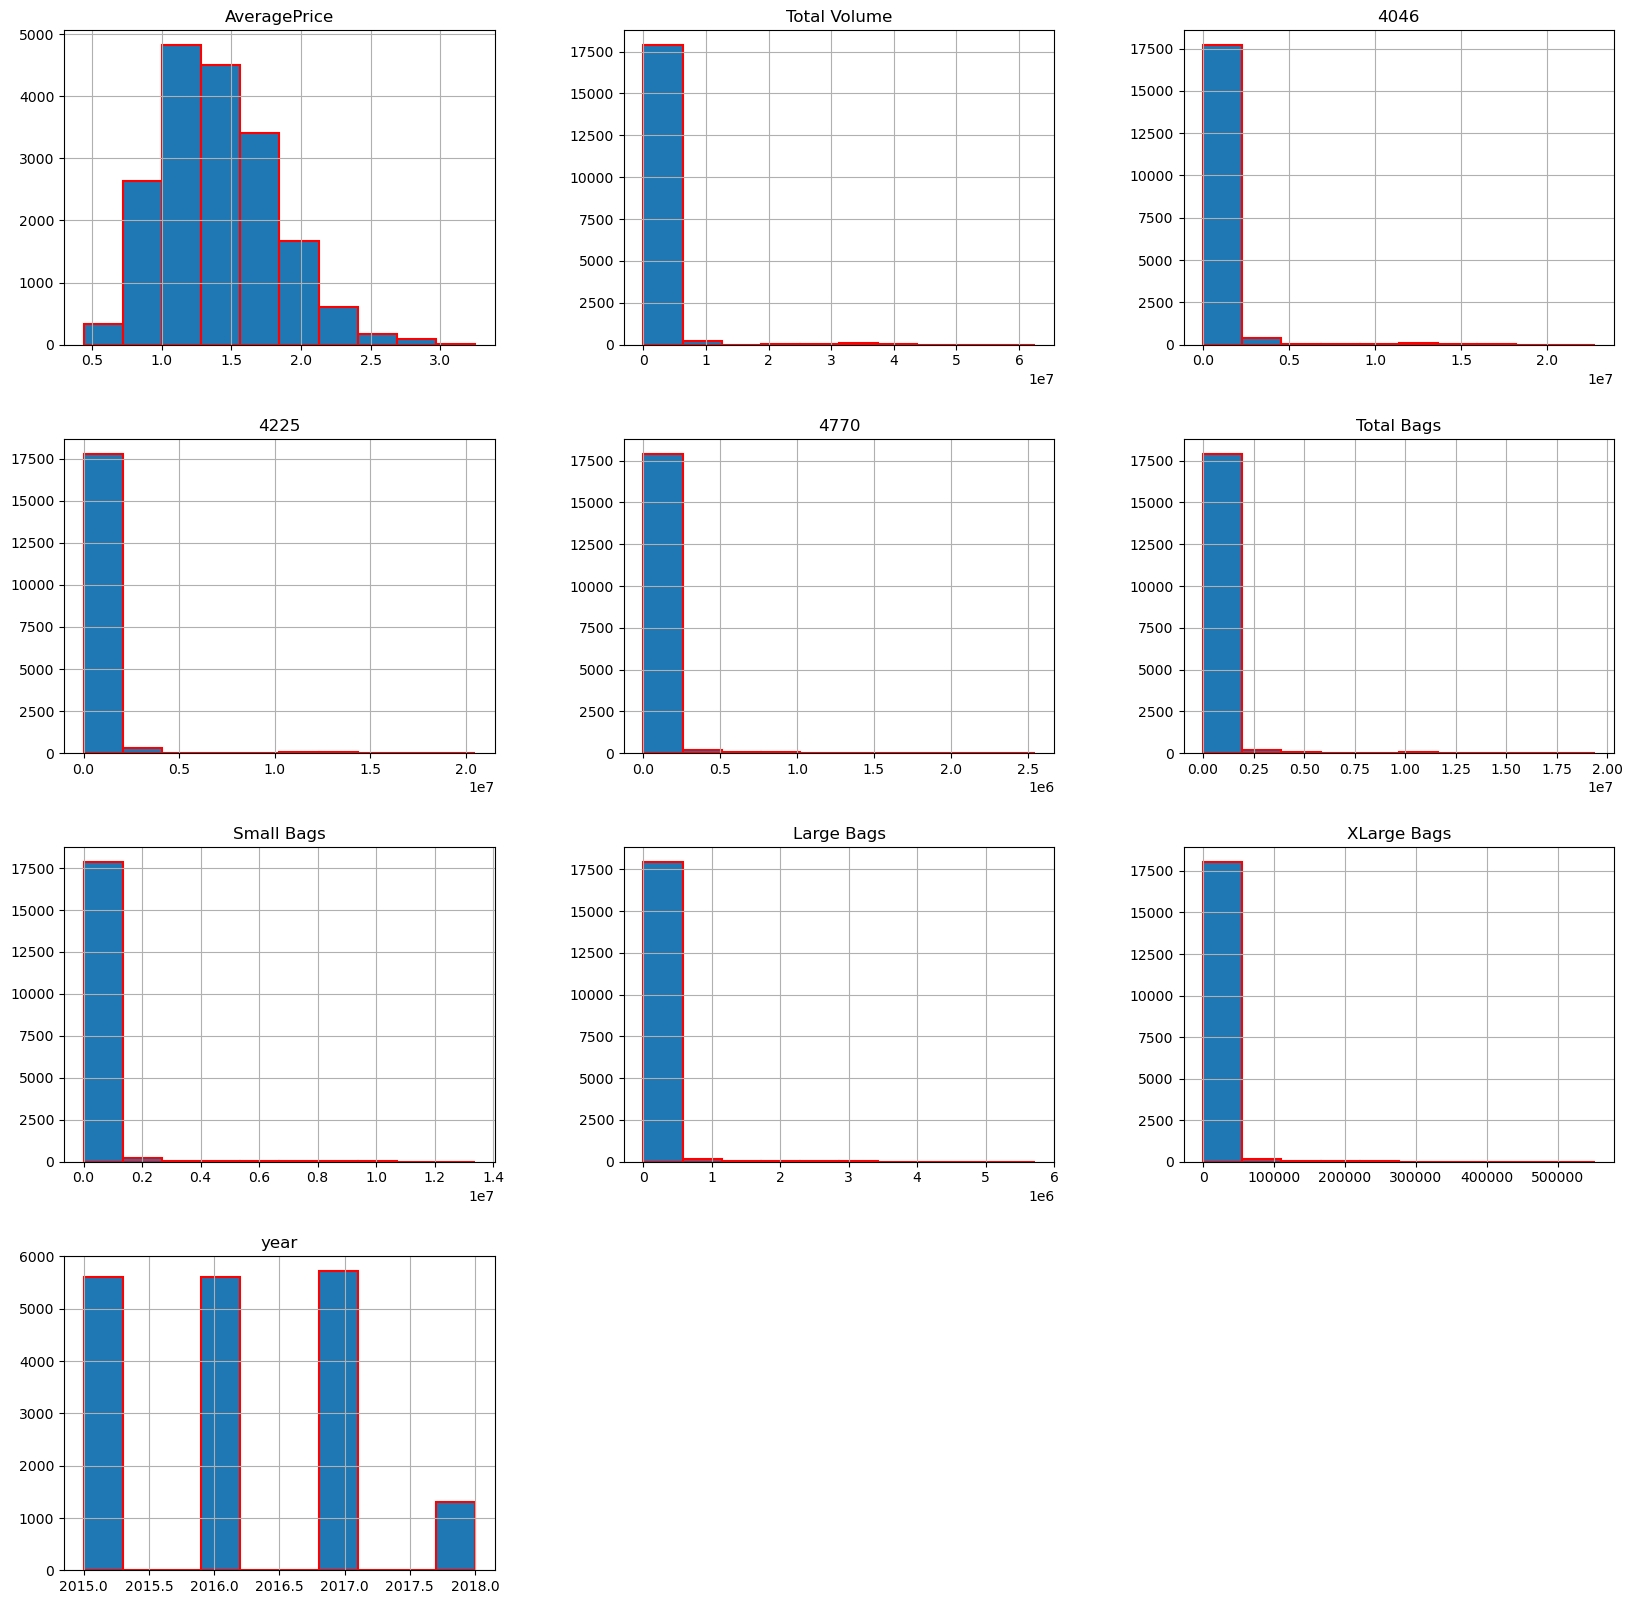

In [19]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

Text(0, 0.5, 'Total Volume')

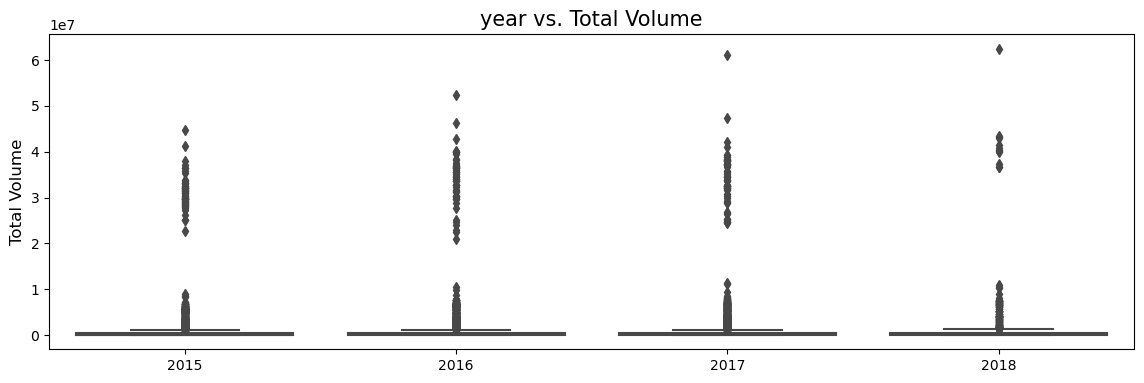

In [20]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='year', y='Total Volume', data=df, palette="Set1")
a.set_title("year vs. Total Volume", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Total Volume", fontsize=12)

Text(0, 0.5, 'Total Volume')

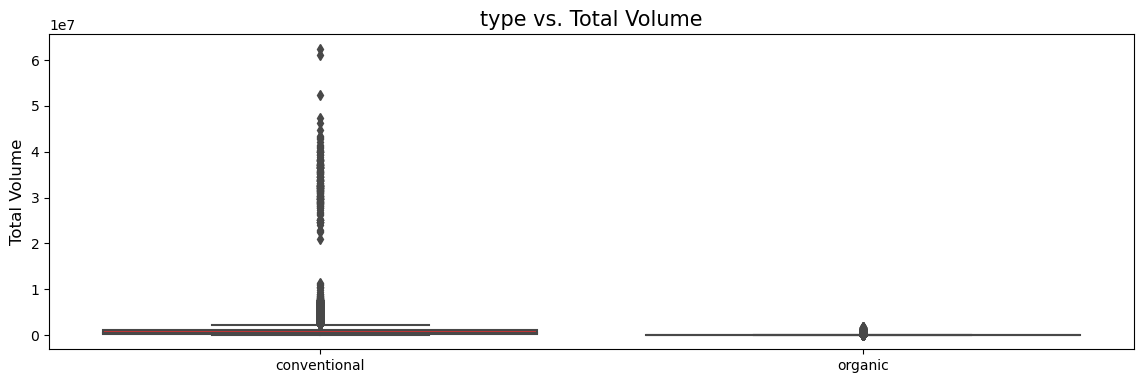

In [21]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='type', y='Total Volume', data=df, palette="Set1")
a.set_title("type vs. Total Volume", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Total Volume", fontsize=12)

In [22]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [23]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')

for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

AveragePrice       Axes(0.125,0.712609;0.168478x0.167391)
Total Volume    Axes(0.327174,0.712609;0.168478x0.167391)
4046            Axes(0.529348,0.712609;0.168478x0.167391)
4225            Axes(0.731522,0.712609;0.168478x0.167391)
4770               Axes(0.125,0.511739;0.168478x0.167391)
Total Bags      Axes(0.327174,0.511739;0.168478x0.167391)
Small Bags      Axes(0.529348,0.511739;0.168478x0.167391)
Large Bags      Axes(0.731522,0.511739;0.168478x0.167391)
XLarge Bags         Axes(0.125,0.31087;0.168478x0.167391)
year             Axes(0.327174,0.31087;0.168478x0.167391)
dtype: object

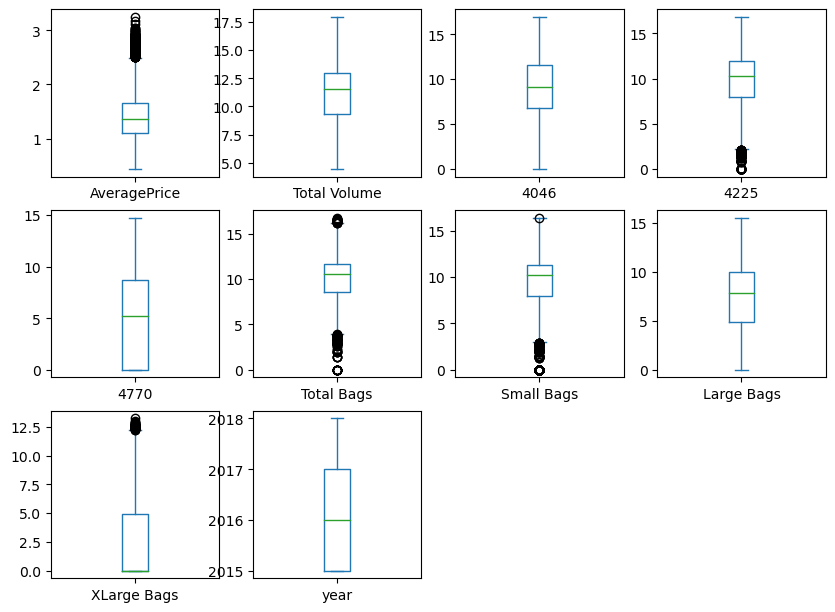

In [24]:
df.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['type']
df['region']=le.fit_transform(df['region'])
df['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [26]:
import datetime

<Axes: title={'center': 'Average price each month'}, xlabel='months', ylabel='AveragePrice'>

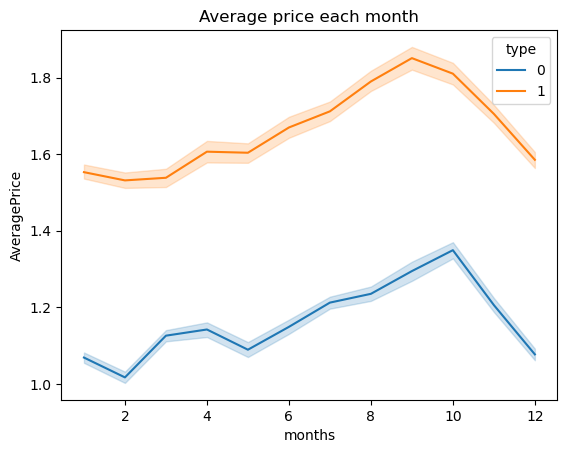

In [27]:
df['Date']=pd.to_datetime(df['Date'])
df["months"]=df['Date'].map(lambda x : x.month)
plt.title('Average price each month')
sns.lineplot(x='months',y='AveragePrice',data=df,hue='type')

In [28]:
da=pd.to_datetime(df['Date'],errors='coerce')
df['Date']=da.dt.strftime("%Y%m%d").astype(int)

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z)

           Date  AveragePrice  Total Volume      4046      4225      4770  \
0      1.165073      0.188689      0.107282  0.609752  0.374936  0.279143   
1      1.165822      0.139020      0.175949  0.737707  0.305200  0.233838   
2      1.166571      1.182069      0.158690  0.688840  0.618892  0.042078   
3      1.167320      0.809551      0.017121  0.583598  0.472808  0.181974   
4      1.175562      0.312861      0.207558  0.638425  0.298852  0.171717   
...         ...           ...           ...       ...       ...       ...   
18244  1.936367      0.556347      0.685006  0.407310  0.878279  1.217613   
18245  1.928232      0.755023      0.775077  0.568306  0.594835  1.217613   
18246  1.927483      1.152375      0.778901  0.568251  0.712597  0.370548   
18247  1.926734      1.301382      0.707798  0.494407  0.644192  0.370240   
18248  1.925985      0.531512      0.674542  0.304151  0.726698  0.087895   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type      year 

In [31]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [32]:
df_new=df[(z<3).all(axis=1)]

In [33]:
print(df.shape)
print(df_new.shape)
df=df_new
print('shape after removing outliers',df.shape)

(18249, 14)
(17834, 14)
shape after removing outliers (17834, 14)


In [34]:
percentage_loss=((18249-17840 )/18249)*100
print(percentage_loss)

2.2412186969148995


In [35]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Date            19579.000000
AveragePrice        0.560000
Total Volume        3.670237
4046                4.823705
4225                3.908651
4770                8.783225
Total Bags          3.005780
Small Bags          3.251940
Large Bags          5.098820
XLarge Bags         5.036547
type                1.000000
year                2.000000
region             27.000000
months              6.000000
dtype: float64


In [36]:
new_df2=df[~((df<Q1-(1.5*IQR))|(df>(Q3+(1.5*IQR)))).any(axis=1)]
new_df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,months
0,20151227,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12
1,20151220,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12
2,20151213,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12
3,20151206,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12
4,20151129,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,20180204,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2
18245,20180128,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1
18246,20180121,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1
18247,20180114,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1


In [37]:
percentage_loss=((18249-11538  )/18249)*100
print(percentage_loss)

36.774617787276014


In [ ]:
the above quartile method we will be loosing 36.77% of data which is too high hence we choose zscoremethod

In [38]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'months'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split
x = df_new.iloc[:,2:13]
y = df_new['AveragePrice']

In [41]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.13249789, -0.62742619,  0.35800125, ..., -0.97748783,
        -1.22957126, -1.69078431],
       [-0.20162572, -0.75550098,  0.28688711, ..., -0.97748783,
        -1.22957126, -1.69078431],
       [ 0.13526087, -0.70658843,  0.6067806 , ..., -0.97748783,
        -1.22957126, -1.69078431],
       ...,
       [-0.8086277 , -0.58588682, -0.75103402, ...,  1.02303064,
         1.96090944,  1.71404749],
       [-0.73704662, -0.51197383, -0.681276  , ...,  1.02303064,
         1.96090944,  1.71404749],
       [-0.70356744, -0.32153998, -0.76541289, ...,  1.02303064,
         1.96090944,  1.71404749]])

In [42]:
y=le.fit_transform(y)

In [43]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [46]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.022427810485001403
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00     

In [47]:
gnb=GaussianNB()

In [48]:
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.008690776562938042
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.20      0.50      0.29         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.01      0.67      0.01         3
          17       0.00      0.00      0.00     

In [49]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.025511634426689096
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00     

In [ ]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

In [ ]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

In [ ]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.03336136809643959
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00      

In [52]:
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.044575273338940284
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00     

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,preddt))

0.044575273338940284


In [54]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
y_pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

NameError: name 'fpr' is not defined

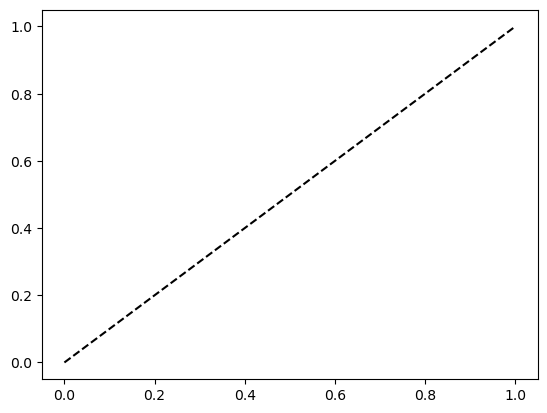

In [55]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False result heart disease')
plt.ylabel('True result heart disease')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn import linear_model

In [57]:
max_r_score=0
for r_state in range (30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20) 
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print("max r2 score corresponding to:-",final_r_state,"is",max_r_score)

max r2 score corresponding to:- 81 is 0.5637829011823027


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81,test_size=0.20) 

In [59]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.17130094085397976

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81,test_size=0.20) 
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print ("r2 score is ",r2_score,(x_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  <function r2_score at 0x00000173DA0108B0> (array([[-1.34366435, -0.39059948, -1.54226769, ...,  1.02303064,
        -0.10422044, -0.40001389],
       [ 0.34242636,  0.34837508,  0.24206969, ..., -0.97748783,
        -1.27486262, -1.24530269],
       [-0.17611797,  0.26302649, -0.78611128, ..., -0.97748783,
        -1.27486262, -1.50682143],
       ...,
       [-1.98167414, -1.41111424, -1.16984869, ...,  1.02303064,
        -0.10422044, -0.78915657],
       [-1.15067119, -0.35870072, -1.56871409, ...,  1.02303064,
        -0.10422044,  0.30733867],
       [-1.15626982, -0.43594408, -1.47499234, ...,  1.02303064,
        -0.10422044,  0.30733867]]), array([124.04675711,  63.48683322,  59.08407229, ..., 151.38947955,
       113.7692221 , 115.62986776]))
RMSE is : 25.784040476354097


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [63]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [64]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range (2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is :-",lsc*100)
    print("R2_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is :- -31.563263001835196
R2_score is:- 56.37826091408967


At cv:- 3
Cross validation score is :- 13.06554460710643
R2_score is:- 56.37826091408967


At cv:- 4
Cross validation score is :- 13.031688336887784
R2_score is:- 56.37826091408967


At cv:- 5
Cross validation score is :- 22.76183974144208
R2_score is:- 56.37826091408967


At cv:- 6
Cross validation score is :- 15.745678230876111
R2_score is:- 56.37826091408967


At cv:- 7
Cross validation score is :- 18.553069242957175
R2_score is:- 56.37826091408967


At cv:- 8
Cross validation score is :- 17.712372317726313
R2_score is:- 56.37826091408967


At cv:- 9
Cross validation score is :- 18.68356017103445
R2_score is:- 56.37826091408967




In [65]:
print ("at cv :-",5)
print("at cross validation score is :-",22.6594)
print("r2_score:-",52.9190)

at cv :- 5
at cross validation score is :- 22.6594
r2_score:- 52.919


In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [68]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ls))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ls))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:-
MeanAbsoluteError: 20.435122531920257
MeanSquaredError: 664.8171883720205
RootMeanSquareError: 25.784049107384597


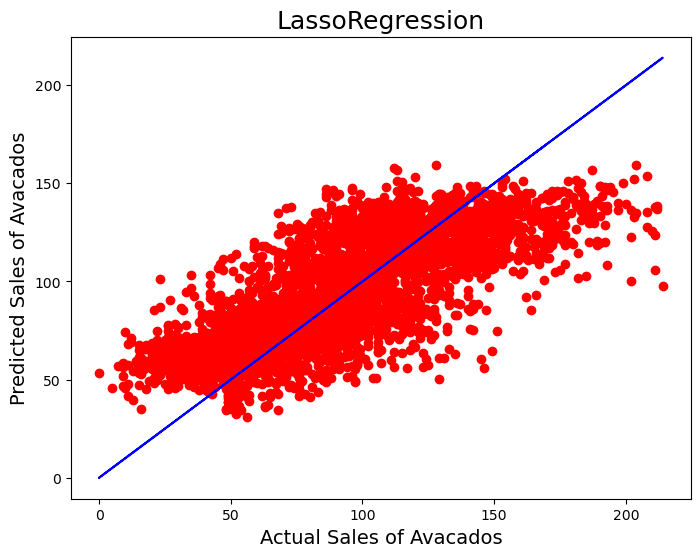

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Sales of Avacados",fontsize=14)
plt.ylabel("Predicted Sales of Avacados",fontsize=14)
plt.title("LassoRegression",fontsize=18)
plt.show()

In [70]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'best'}


In [71]:
dt=DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)

dts=r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore=cross_val_score(dt,x,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

R2 Score: 68.55195440294017
cross val score: -26.506145538517988


In [73]:
from sklearn.linear_model import SGDRegressor
parameters={'alpha':[0.0001,0.001,0.01,0.1],'epsilon':[0.01,0.1],'penalty':['elasticnet'],'max_iter':[1000],'tol':[1e-3]}
SGD=SGDRegressor()
clf=GridSearchCV(SGD,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'alpha': 0.0001, 'epsilon': 0.1, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}


In [74]:
SGD=SGDRegressor(alpha=0.0001,epsilon=0.01,max_iter=1000,penalty='elasticnet',tol=0.001)
SGD.fit(x_train,y_train)
pred_SGD=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()


In [75]:
print(f"Accuracy={r2score*100},Cross_Val_score={cvscore*100}and difference={(r2score*100)-(cvscore*100)}")

Accuracy=56.37829011823027,Cross_Val_score=53.36050709803716and difference=3.0177830201931073


In [76]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_SGD))
print('MeanSquaredError:',mean_squared_error(y_test,pred_SGD))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_SGD)))

Error:-
MeanAbsoluteError: 20.474521083277008
MeanSquaredError: 666.4481022305954
RootMeanSquareError: 25.815656145653076


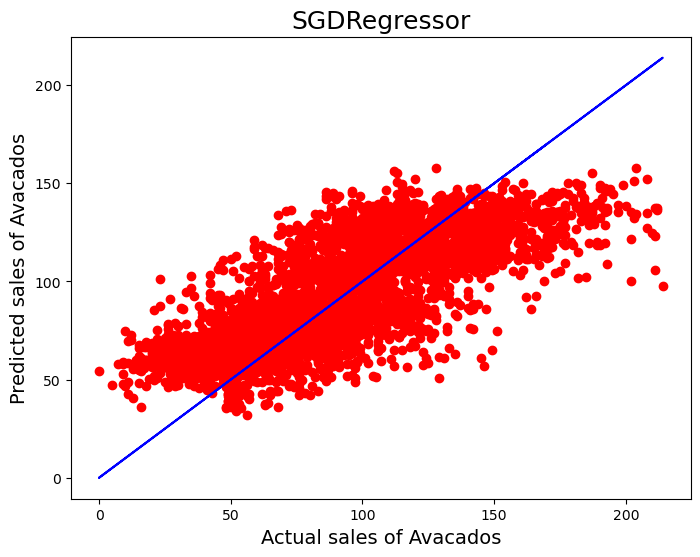

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_SGD,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales of Avacados",fontsize=14)
plt.ylabel("Predicted sales of Avacados",fontsize=14)
plt.title("SGDRegressor",fontsize=18)
plt.show()

In [78]:
parameters={"alpha":[0.0001,0.001,0.01,0.1,1,10],"epsilon":[0.01,0.1],'max_iter':[1000],'tol':[1e-3]}

from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')

GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)


print("Final accuracy:",r2_score(y_test,GCV_pred)*100)
clf.fit

Final accuracy: 56.393845489390685


<bound method BaseSearchCV.fit of GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'epsilon': [0.01, 0.1], 'max_iter': [1000],
                         'penalty': ['elasticnet'], 'tol': [0.001]})>

In [79]:
import numpy as np
a=np.array(y_test)
predicted=np.array(SGD.predict(x_test))

In [80]:
df_final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [81]:
df_final

,original,predicted
0,170,123.403287
1,72,63.645880
2,56,58.977509
3,150,110.602391
4,58,81.935967
...,...,...
3562,100,86.777017
3563,60,73.105717
3564,161,149.996888
3565,143,113.074717
